# Goal
This notebook aims to introduce how Bayesian Optimization works using `bayesian-optimization` module. 

**Bayesian Optimization** is the way of estimating the unknown function where we can choose the arbitrary input $x$ and obtain the response from that function. The outcome of Bayesian Optimization is to obtain the mean and confidence interval of the function we look for by step. You could also stop earlier or decide go further iteratively.  

This will cover the very first toy example of Bayesian Optimization by defining "black-box" function and show how interactively or step-by-step Bayesian Optimization will figure and estimate this "black-box" function. 



**Reference**
* [Github: Bayesian Optimization](https://github.com/fmfn/BayesianOptimization)
* [Jupyter notebook: Bayesian Optimization Visualization Example](https://github.com/fmfn/BayesianOptimization/blob/master/examples/visualization.ipynb)

# Libraries

In [41]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np
import warnings
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# Unknown Function 
We can have any function to estimate here. As an example, we will have 1-D function defined by the following equation:

$$f(x) = 3e^{-(x-3)^{2}} - e^{-(x-2)^2} + 2 e^{-(x+3)^2}$$



In [2]:
def unknown_func(x):
    return 3 * np.exp(-(x-3) **2) - np.exp(-(x-2) **2) + 2 * np.exp(-(x + 3) **2)

If we visualize the unknown function (as a reference), we can plot like below. Note that we are not supposed to know this plot since this function is **"black-box"**

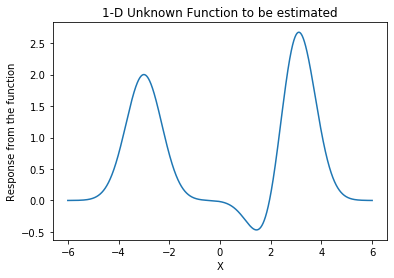

In [4]:
x = np.linspace(-6, 6, 10000).reshape(-1, 1)
y = unknown_func(x)

plt.plot(x, y);
plt.title('1-D Unknown Function to be estimated');
plt.xlabel('X');
plt.ylabel('Response from the function');

# Bayesian Optimization 
First of all, we need to create BayesianOptimization object by passing the function `f` you want to estimate with its input boundary as `pbounds`. 


In [5]:
optimizer = BayesianOptimization(f=unknown_func, pbounds={'x': (-6, 6)}, verbose=0)
optimizer

Then, we can start to explore this function by trying different inputs. 

* `init_points` is the number of initial points to start with.
* `n_iter` is the number of iteration. This `optimizer.maximize` hold the state so whenever you execute it, it will continue from the last iteration. 

## Helper functions

In [26]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y, fig=None, xlim=None):
    if fig is None:
        fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.3, fc='C0', ec='None', label='95% confidence interval')
    if xlim is not None:
        axis.set_xlim(xlim)
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='C3')
    acq.plot(x[np.argmax(utility)], np.max(utility), 'o', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    if xlim is not None:
        acq.set_xlim(xlim)
    acq.set_ylim((np.min(utility) , np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    return fig

## Visualize the iterative step


In [54]:
# fig = plt.figure(figsize=(16, 10))
xlim = (-6, 6)
optimizer = BayesianOptimization(f=unknown_func, pbounds={'x': xlim}, verbose=0)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(15):
        break
#         optimizer.maximize(init_points=0, n_iter=1, kappa=5)
#         fig = plot_gp(optimizer, x, y, fig=fig, xlim=xlim)
#         display(plt.gcf())
#         clear_output(wait=True)


![2019-10-31 16-11-38 2019-10-31 16_15_50_bayesian_optimization](https://user-images.githubusercontent.com/8764683/67992416-d32ed100-fbf9-11e9-88f2-1c8120f9272d.gif)
